# MNIST-Neural Network-Two Hidden Layers

## 1.MNIST 데이터 로딩

In [1]:
# coding: utf-8
import urllib.request
import os.path
import gzip
import pickle
import os
import numpy as np

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname("/Users/yhhan/git/aiclass/0.Professor/3.VanillaNN/MNIST_data/.")
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    print(file_path)
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    dataset['validation_img'] = dataset['train_img'][55000:]
    dataset['validation_label'] = dataset['train_label'][55000:]
    dataset['train_img'] =  dataset['train_img'][:55000]
    dataset['train_label'] = dataset['train_label'][:55000]
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'validation_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['validation_label'] = _change_one_hot_label(dataset['test_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'validation_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['validation_img'], dataset['validation_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

/Users/yhhan/git/aiclass/0.Professor/3.VanillaNN/MNIST_data/train-images-idx3-ubyte.gz
/Users/yhhan/git/aiclass/0.Professor/3.VanillaNN/MNIST_data/train-labels-idx1-ubyte.gz
/Users/yhhan/git/aiclass/0.Professor/3.VanillaNN/MNIST_data/t10k-images-idx3-ubyte.gz
/Users/yhhan/git/aiclass/0.Professor/3.VanillaNN/MNIST_data/t10k-labels-idx1-ubyte.gz
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


- Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:
<img src="https://www.tensorflow.org/versions/r0.11/images/MNIST-Matrix.png" width="50%" />

- flatten 1-D tensor of size 28x28 = 784.
  - Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.
$$[0, 0, 0, ..., 0.6, 0.7, 0.7, 0.5, ... 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.3, ..., 0.4, 0.4, 0.4, ... 0, 0, 0]$$ 

- Number of train images is 55000.
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-xs.png" width="50%" />

- A one-hot vector is a vector which is 0 in most entries, and 1 in a single entry.
- In this case, the $n$th digit will be represented as a vector which is 1 in the nth entry. 
  - For example, 3 would be $[0,0,0,1,0,0,0,0,0,0]$. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-ys.png" width="48%" />

In [2]:
(img_train, label_train), (img_validation, label_validation), (img_test, label_test) = load_mnist(flatten=True, normalize=False)
print(img_train.shape)
print(label_train.shape)
print(img_validation.shape)
print(label_validation.shape)
print(img_test.shape)
print(label_test.shape)

(55000, 784)
(55000,)
(5000, 784)
(5000,)
(10000, 784)
(10000,)


5
0
4
1
9


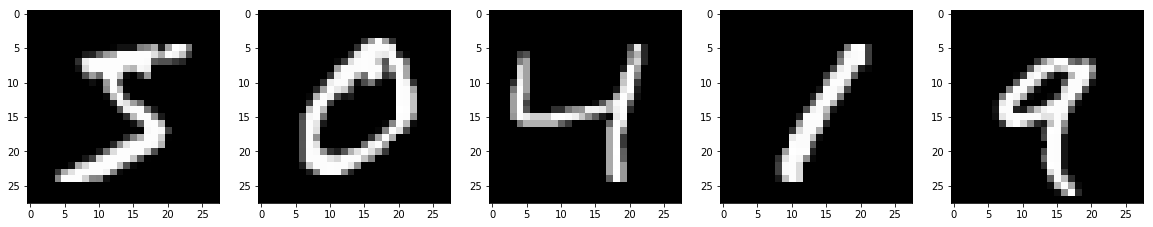

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    print(label_train[i])
    img = img_train[i]
    img = img.reshape(28, 28)
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img, cmap='gray')

## 2. Neural Network 모델 구성 

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))   

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

def init_network():
    network = {}
    network['W1'] = np.zeros([784, 1024])
    network['b1'] = np.zeros([1024])
    network['W2'] = np.zeros([1024, 1024])
    network['b2'] = np.zeros([1024])
    network['W3'] = np.zeros([1024, 10])
    network['b3'] = np.zeros([10])
    return network
    
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

## 3. MNIST Test 테이터에 대한 단순 Feed Forward

In [5]:
_, _, (img_test, label_test) = load_mnist(flatten=True, normalize=False)
network = init_network()
accuracy_cnt = 0

for i in range(len(img_test)):
    y = predict(network, img_test[i])
    p = np.argmax(y)
    if p == label_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(img_test)))

Accuracy:0.098


## 4. MNIST Test 테이터에 대하여 Batch를 활용한 Feed Forward

In [6]:
_, _, (img_test, label_test) = load_mnist(flatten=True, normalize=False)
network = init_network()
accuracy_cnt = 0
batch_size = 100

for i in range(0, len(img_test), batch_size):
    x_batch = img_test[i: i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == label_test[i: i + batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(img_test)))

Accuracy:0.098


## 5. 2층 신경망을 이용한 학습 및 테스트 

In [9]:
def relu(x):
    return np.maximum(0, x)

class TwoLayerNet:
    def __init__(self, input_size, hidden_layer1_size, hidden_layer2_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_layer1_size)
        self.params['b1'] = np.zeros(hidden_layer1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_layer1_size, hidden_layer2_size)
        self.params['b2'] = np.zeros(hidden_layer2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_layer2_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        print("W1-shape: {0}, b1-shape: {1}, W2-shape: {2}, b2-shape: {3}, W3-shape: {4}, b3-shape: {5}".format(
            self.params['W1'].shape,
            self.params['b1'].shape,
            self.params['W2'].shape,
            self.params['b2'].shape,
            self.params['W3'].shape,
            self.params['b3'].shape
        ))

    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
    
        a1 = np.dot(x, W1) + b1
        z1 = relu(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = relu(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        
        return y

    def cross_entropy_error(self, x, t):
        y = self.predict(x)
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        if t.size == y.size:
            t = t.argmax(axis=1)

        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_derivative(self, params, x, z_target):
        delta = 1e-4 # 0.0001
        grad = np.zeros_like(params)
       
        it = np.nditer(params, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            temp_val = params[idx]

            #f(x + delta) 계산
            params[idx] = params[idx] + delta
            fxh1 = self.cross_entropy_error(x, z_target)
            
            #f(x - delta) 계산
            params[idx] = params[idx] - delta
            fxh2 = self.cross_entropy_error(x, z_target)
            
            #f(x + delta) - f(x - delta) / 2 * delta 계산
            grad[idx] = (fxh1 - fxh2) / (2 * delta)
            params[idx] = temp_val
            it.iternext()
        return grad
   
    def learning(self, learning_rate, x_batch, t_batch):
        for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
            grad = self.numerical_derivative(self.params[key], x_batch, t_batch)
            self.params[key] = self.params[key] - learning_rate * grad

## Learning and Validation
- 아래 코드의 수행시간은 매우 길기 때문에 Hidden Layer에 포함되는 Neuron을 5개만 두었음 

In [ ]:
import math
(img_train, label_train), (img_validation, label_validation), (img_test, label_test) = load_mnist(flatten=True, normalize=False)

network = TwoLayerNet(input_size=784, hidden_layer1_size=5, hidden_layer2_size=5, output_size=10)

num_epochs = 50
train_size = img_train.shape[0]
batch_size = 1000
learning_rate = 0.1

train_error_list = []
validation_error_list = []

test_accuracy_list = []
epoch_list = []

num_batch = math.ceil(train_size / batch_size)

for i in range(num_epochs):
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = img_train[batch_mask]
#     t_batch = label_train[batch_mask]
#     network.learning(learning_rate, x_batch, t_batch)

    j = 0
    for j in range(num_batch):
        x_batch = img_train[j * batch_size : j * batch_size + batch_size]
        t_batch = label_train[j * batch_size : j * batch_size + batch_size]
        network.learning(learning_rate, x_batch, t_batch)    
    network.learning(learning_rate, x_batch, t_batch)
    
    epoch_list.append(i)
    
    train_loss = network.cross_entropy_error(x_batch, t_batch)
    train_error_list.append(train_loss)
    
    validation_loss = network.cross_entropy_error(img_validation, label_validation)
    validation_error_list.append(validation_loss)    
    
    test_accuracy = network.accuracy(img_test, label_test)
    test_accuracy_list.append(test_accuracy)       
    
    print("Epoch: {0:5d}, Train Error: {1:7.5f}, Validation Error: {2:7.5f} - Test Accuracy: {3:7.5f}".format(
        i,
        train_loss,
        validation_loss,
        test_accuracy
    ))

W1-shape: (784, 5), b1-shape: (5,), W2-shape: (5, 5), b2-shape: (5,), W3-shape: (5, 10), b3-shape: (10,)


## Analysis with Graph


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Draw Graph about Error Values & Accuracy Values
def draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list):
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list)
    
def draw_false_prediction(diff_index_list):
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(img_test[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
        
prediction = np.argmax(network.predict(img_test), axis=1)
ground_truth = np.argmax(label_test, axis=1)
        
print(prediction)
print(ground_truth)

diff_index_list = []
for i in range(len(img_test)):
    if (prediction[i] != ground_truth[i]):
        diff_index_list.append(i)

print("Total Test Image: {0}, Number of False Prediction: {1}".format(len(img_test), len(diff_index_list)))
print("Test Accuracy:", float(len(img_test) - len(diff_index_list)) / float(len(img_test)))
draw_false_prediction(diff_index_list)